# Importing packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Importing database

In [22]:
df = pd.read_csv('/content/drive/MyDrive/ForCoding/Air_pollution.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [4]:
df.shape

(43824, 13)

In [8]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [7]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [15]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,2067
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [16]:
for item in df.columns:
    # Replacing mode in every column for null cells
    temp=df[item].value_counts().index[0]
    df[item].fillna(temp,inplace=True)

In [17]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [26]:
for i in df.columns:
  print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0            1
1            2
2            3
3            4
4            5
         ...  
43819    43820
43820    43821
43821    43822
43822    43823
43823    43824
Name: No, Length: 43824, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
43819    2014
43820    2014
43821    2014
43822    2014
43823    2014
Name: year, Length: 43824, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
43819    12
43820    12
43821    12
43822    12
43823    12
Name: month, Length: 43824, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
43819    31
43820    31
43821    31
43822    31
43823    31
Name: day, Length: 43824, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0         0
1         1
2         2

In [24]:
df['cbwd'] = df['cbwd'].astype('category').cat.codes
df['cbwd'].value_counts()

,count
cbwd,
2,15290
1,14150
3,9387
0,4997


In [27]:
features = df[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']]
target = df['pm2.5']

In [28]:
target

,pm2.5
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
43819,8.0
43820,10.0
43821,10.0
43822,8.0


In [29]:
# Standardization the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Standardization the target
target_scaler = MinMaxScaler()
scaled_target = target.values.reshape(-1, 1)
scaled_target = target_scaler.fit_transform(scaled_target)

In [65]:
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size-1):
        X.append(data[i:i + window_size])
        y.append(target[i + window_size+1])
    return np.array(X), np.array(y)

In [66]:
# 24 hour
X, y = create_sequences(scaled_features, scaled_target, 24)

In [67]:
split_threshold = int(len(X) * 0.8)
X_train, X_test = X[:split_threshold], X[split_threshold:]
y_train, y_test = y[:split_threshold], y[split_threshold:]
print(f'X_train: {X_train.shape} \n X_test: {X_test.shape}')

X_train: (35039, 24, 11) 
 X_test: (8760, 24, 11)


# LSTM Model

In [68]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 24, 50)              │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,651 (127.54 KB)

 Trainable params: 32,651 (127.54 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Defining early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [71]:
Hist = model.fit(X_train, y_train, epochs=50, batch_size=76, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - loss: nan - val_loss: nan
Epoch 2/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: nan - val_loss: nan
Epoch 3/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: nan - val_loss: nan
Epoch 4/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: nan - val_loss: nan
Epoch 5/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: nan - val_loss: nan
Epoch 6/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: nan - val_loss: nan
Epoch 7/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: nan - val_loss: nan
Epoch 8/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: nan - val_loss: nan
Epoch 9/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: nan - val_loss: nan
Epoch 10/50
369/369 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: nan - val_loss: nan


In [72]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: nan
Test Loss: nan


In [73]:
y_pred = model.predict(X_test)

274/274 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [74]:
# After prediction
# Inverse transform predictions and actual values
y_test = target_scaler.inverse_transform(y_test)
y_pred = target_scaler.inverse_transform(y_pred)

In [75]:
print("First 5 Actual Values (after inverse transform):\n", y_test[:5])
print("First 5 Predicted Values (after inverse transform):\n", y_pred[:5])

First 5 Actual Values (after inverse transform):
 [[24.]
 [53.]
 [65.]
 [70.]
 [79.]]
First 5 Predicted Values (after inverse transform):
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [76]:
mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {mse}')

ValueError: Input contains NaN.

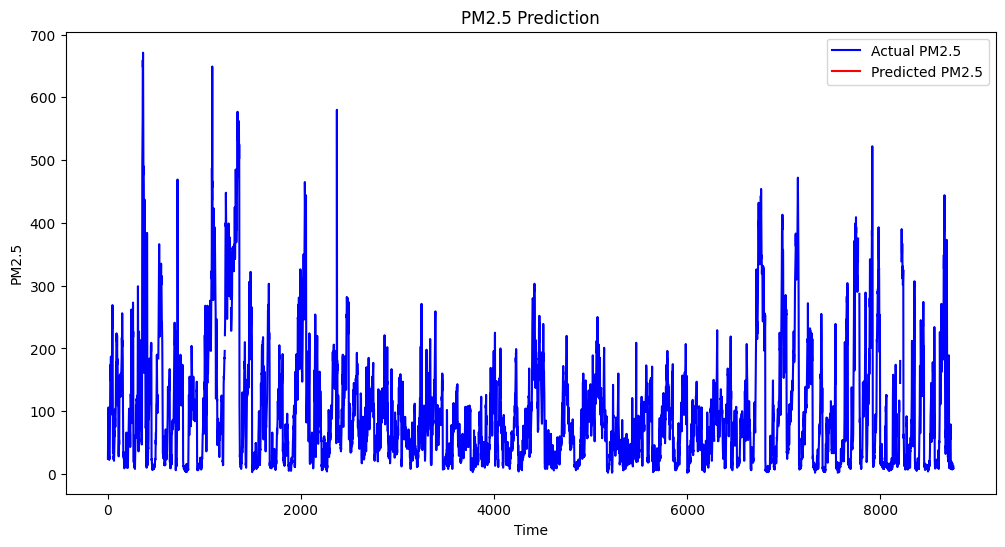

In [77]:
plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Actual PM2.5')
plt.plot(y_pred, color='red', label='Predicted PM2.5')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

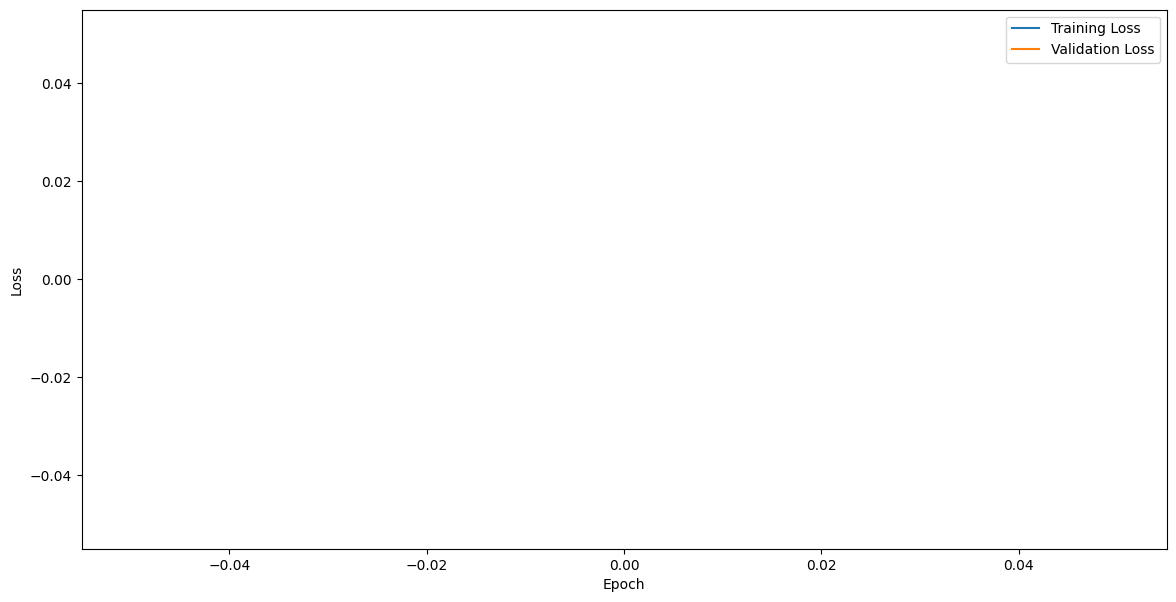

In [78]:
plt.figure(figsize=(14, 7))
plt.plot(Hist.history['loss'], label='Training Loss')
plt.plot(Hist.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()